

# RFM Analysis

## What is RFM?

RFM stands for:
- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much a customer spends on purchases.

The goal of RFM analysis is to segment customers into meaningful categories based on these three metrics.

## Dataset Overview

The dataset contains:
- `customer_id`: Unique identifier for each customer.
- `trans_date`: The date on which the transaction occurred.
- `tran_amount`: The amount spent on each transaction.


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 1. Data Preparation

First, load the dataset and inspect its structure.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [4]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
head = df.head(5)
custcheck = df[df['customer_id'] == 'CS5295'].count()
display(head, custcheck, df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 124994 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  124994 non-null  object        
 1   trans_date   124994 non-null  datetime64[ns]
 2   tran_amount  124994 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ MB


,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


customer_id    25
trans_date     25
tran_amount    25
dtype: int64

None

In [7]:
df['trans_date'].min()

Timestamp('2011-05-16 00:00:00')

In [8]:
reference_date = df['trans_date'].max() + dt.timedelta(days=1)

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 2. Calculate RFM Metrics

### Recency:
Recency represents how recently a customer made a purchase. It is calculated by taking the difference between the current reference date (which is the latest transaction date in the dataset) and the most recent transaction date for each customer.

### Frequency:
Frequency measures how often a customer makes purchases. It is calculated by counting the number of transactions made by each customer.

### Monetary:
Monetary represents the total amount spent by a customer. It is calculated by summing the transaction amounts for each customer.

At this stage, we group the dataset by `customer_id` and calculate the Recency, Frequency, and Monetary values for each customer.


In [9]:
# Aggregate the data with descriptive column names
rfm_df = df.groupby('customer_id').agg(
    Last_Purchase_Date=('trans_date', 'max'),  # Get the date of the most recent transaction
    Frequency=('trans_date', 'count'),         # Count the total number of transactions
    Monetary=('tran_amount', 'sum')            # Sum the total amount spent
).reset_index()

# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days

# Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary']]

rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,CS1112,62,15,1012
1,CS1113,36,20,1490
2,CS1114,33,19,1432
3,CS1115,12,22,1659
4,CS1116,204,13,857


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 3. RFM Scoring

Once we have the RFM metrics, we assign a score between 1 and 5 for each metric. The scores are based on quintiles:
- **Recency**: Lower recency (more recent purchase) gets a higher score.
- **Frequency**: Higher frequency (more purchases) gets a higher score.
- **Monetary**: Higher monetary value (more money spent) gets a higher score.

These scores are then combined to create an RFM score for each customer.

In [10]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [11]:
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,CS1112,62,15,1012,3,2,2
1,CS1113,36,20,1490,4,4,4
2,CS1114,33,19,1432,4,3,4
3,CS1115,12,22,1659,5,4,5
4,CS1116,204,13,857,1,1,2
...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,2,1,1
6885,CS8997,262,14,543,1,2,1
6886,CS8998,85,13,624,2,1,1
6887,CS8999,258,12,383,1,1,1


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 4. Combine RFM Scores

The next step involves combining the Recency, Frequency, and Monetary scores into a single RFM score. This score is generated by concatenating the Recency, Frequency, and Monetary scores for each customer. The resulting RFM score gives a comprehensive view of a customer’s behavior in terms of their engagement and value.

In [12]:
rfm_df['RFM_Score'] = rfm_df.R_Score.astype(str) + rfm_df.F_Score.astype(str) + rfm_df.M_Score.astype(str)

rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CS1112,62,15,1012,3,2,2,322
1,CS1113,36,20,1490,4,4,4,444
2,CS1114,33,19,1432,4,3,4,434
3,CS1115,12,22,1659,5,4,5,545
4,CS1116,204,13,857,1,1,2,112
...,...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,2,1,1,211
6885,CS8997,262,14,543,1,2,1,121
6886,CS8998,85,13,624,2,1,1,211
6887,CS8999,258,12,383,1,1,1,111


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 5. RFM Segmentation

In this step, we use combined RFM scores to segment customers into various groups. Each segment represents different customer behaviors based on recency, frequency, and monetary value.

Here are the common segments used in RFM analysis:

- **Hibernating**: Customers who have not made a purchase in a long time, with low frequency and monetary value.
- **At Risk**:  Previously active customers who have not made a purchase for a while, indicating potential churn or loss.
- **Cannot Lose Them**: Customers with high monetary value but low purchase frequency and who have not made a purchase for a long time, requiring special attention to prevent loss.
- **About to Sleep**: Customers with moderate recency and frequency who might stop transacting if not reactivated.
- **Need Attention**: Customers with good potential who need more attention and engagement to boost their activity.
- **Promising**: New customers who have the potential to become loyal or high-value customers.
- **Champion**: Top customers who purchase frequently, have made a recent purchase, and have high spending.
- **Loyal Customer**: Loyal customers who purchase frequently and have high monetary value.
- **Potential Loyalist**: Customers who are almost loyal but not fully, possibly with high frequency but still medium monetary value.
- **New Customers**: Customers who have just made a purchase and may still be exploring the product or brand.
- **Lost**: Customers who have not purchased in a long time, with low frequency and monetary value, and are likely to be lost or churn.

In [13]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'].astype(int))
rfm_df.head(5)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,CS1112,62,15,1012,3,2,2,322,Hibernating
1,CS1113,36,20,1490,4,4,4,444,Loyal Customer
2,CS1114,33,19,1432,4,3,4,434,Need Attention
3,CS1115,12,22,1659,5,4,5,545,Champion
4,CS1116,204,13,857,1,1,2,112,Lost


In [14]:
pd.DataFrame(rfm_df['Customer Segment'].value_counts())

,count
Customer Segment,
Hibernating,1229
Champion,1029
At Risk,810
Potential Loyalist,800
Loyal Customer,776
New Customer,727
Lost,566
Promising,275
Cannot Lose Them,254


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 6. Analyze the Segments

Once customers are segmented, we analyze each segment to understand their behavior:
- **Recency**: How recently customers in each segment have purchased.
- **Frequency**: How often customers in each segment make purchases.
- **Monetary**: How much customers in each segment spend.

This analysis provides insights into which customer groups need more attention and which are high-value, helping businesses tailor their marketing strategies.

In [15]:
# pip install squarify --quiet

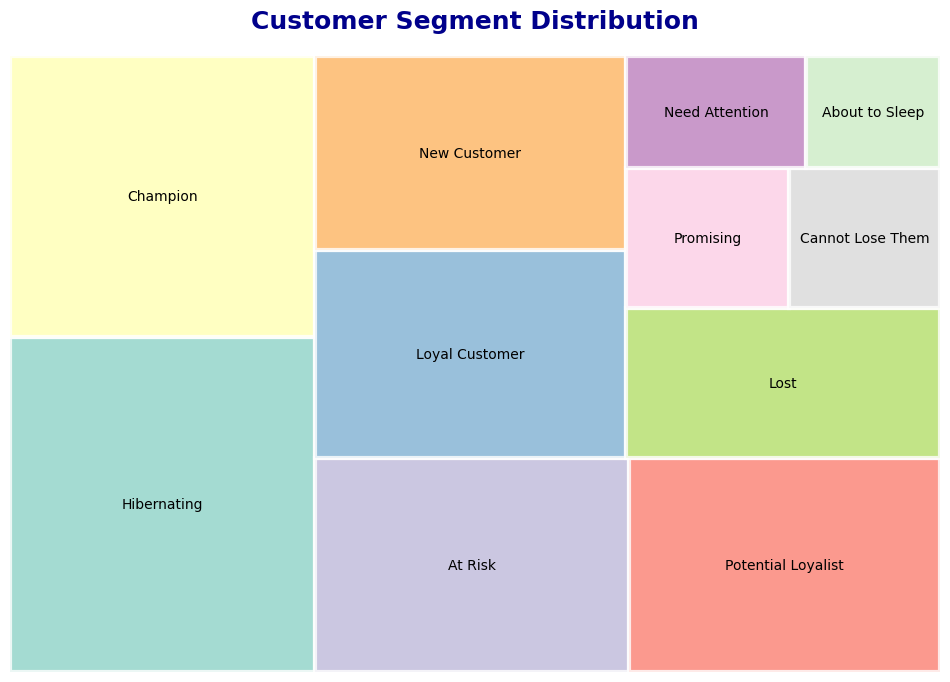

In [16]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

colors = sns.color_palette('Set3', len(segment_counts))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Customer Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

In [17]:
rfm_df.to_csv('rfm.csv', index=False)

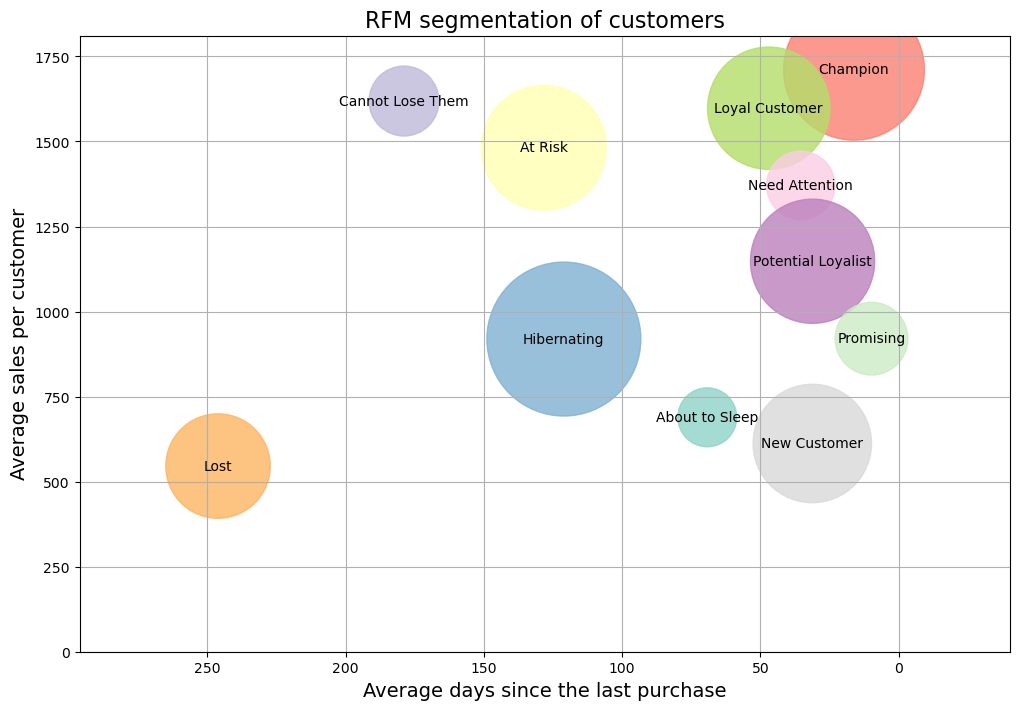

In [18]:
df = pd.read_csv("rfm.csv")

segment_summary = df.groupby('Customer Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('customer_id', 'count')
).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    segment_summary['avg_days_since_purchase'],
    segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 10,
    c=sns.color_palette('Set3', len(segment_summary)),
    alpha=0.8
)

# Labeling the axes and title
plt.xlabel('Average days since the last purchase', fontsize=14)
plt.ylabel('Average sales per customer', fontsize=14)
plt.title('RFM segmentation of customers', fontsize=16)
plt.grid(True)

for i, text in enumerate(segment_summary['Customer Segment']):
    plt.annotate(
        text,
        (segment_summary['avg_days_since_purchase'][i], segment_summary['avg_sales_per_customer'][i]),
        ha='center',
        va='center'
    )

plt.gca().invert_xaxis()

plt.xlim(segment_summary['avg_days_since_purchase'].max() + 50, segment_summary['avg_days_since_purchase'].min() - 50)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 100)

plt.show()


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
Export Segmented Dataset